In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_excel('UUCF Assignment Spreadsheet.xls',sheet_name = 'movie-row')
user = pd.read_excel('UUCF Assignment Spreadsheet.xls',sheet_name = 'user-row')


In [3]:
movie.shape

(100, 25)

In [4]:
user.shape

(25, 100)

### Estimating correlation between users. We have the matrix containing pairwise correlation between all rows.

In [5]:
user.T.corr().head()

,1648,5136,918,2824,3867,860,3712,2968,3525,4323,...,3556,5261,2492,5062,2486,4942,2267,4809,3853,2288
1648,1.000000,0.402980,-0.142206,0.517620,0.300200,0.480537,-0.312412,0.383348,0.092775,0.098191,...,-0.191988,0.493008,0.360644,0.551089,0.002544,0.116653,-0.429183,0.394371,-0.304422,0.245048
5136,0.402980,1.000000,0.118979,0.057916,0.341734,0.241377,0.131398,0.206695,0.360056,0.033642,...,0.488607,0.328120,0.422236,0.226635,0.305803,0.037769,0.240728,0.411676,0.189234,0.390067
918,-0.142206,0.118979,1.000000,-0.317063,0.294558,0.468333,0.092037,-0.045854,0.367568,-0.035394,...,0.373226,0.470972,0.069956,-0.054762,0.133812,0.015169,-0.273096,0.082528,0.667168,0.119162
2824,0.517620,0.057916,-0.317063,1.000000,-0.060913,-0.008066,0.462910,0.214760,0.169907,0.119350,...,-0.201275,0.228341,0.238700,0.259660,0.247097,0.149247,-0.361466,0.474974,-0.262073,0.166999
3867,0.300200,0.341734,0.294558,-0.060913,1.000000,0.282497,0.400275,0.264249,0.125193,-0.333602,...,0.174085,0.297977,0.476683,0.293868,0.438992,-0.162818,-0.295966,0.054518,0.464110,0.379856


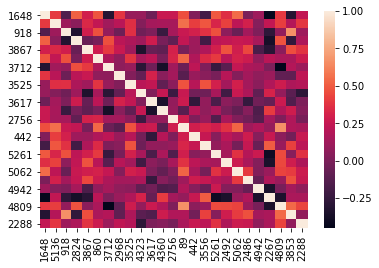

In [6]:
cor = user.T.corr() # Complete the user-by-user correlations matrix
sns.heatmap(cor)

### Identify the top 5 neighbors (the users with the 5 largest, positive correlations)

In [12]:
user_thirty_cor =cor.loc[3867].sort_values(ascending = False).drop(3867).head(5)
user_thirty_cor 



2492    0.476683
3853    0.464110
2486    0.438992
3712    0.400275
2288    0.379856
Name: 3867, dtype: float64

In [15]:
user_eighty_cor = cor.loc[89].sort_values(ascending = False).drop(89).head(5)
user_eighty_cor

4809    0.668516
5136    0.562449
860     0.539066
5062    0.525990
3525    0.475495
Name: 89, dtype: float64

In [34]:
user_thirty = user.loc[[2492, 3853, 2486, 3712, 2288],:]
user_thirty_filled = user_thirty.fillna(0,inplace=True)
user_thirty

,11: Star Wars: Episode IV - A New Hope (1977),12: Finding Nemo (2003),13: Forrest Gump (1994),14: American Beauty (1999),22: Pirates of the Caribbean: The Curse of the Black Pearl (2003),24: Kill Bill: Vol. 1 (2003),38: Eternal Sunshine of the Spotless Mind (2004),63: Twelve Monkeys (a.k.a. 12 Monkeys) (1995),77: Memento (2000),85: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),...,8467: Dumb & Dumber (1994),8587: The Lion King (1994),9331: Clear and Present Danger (1994),9741: Unbreakable (2000),9802: The Rock (1996),9806: The Incredibles (2004),10020: Beauty and the Beast (1991),36657: X-Men (2000),36658: X2: X-Men United (2003),36955: True Lies (1994)
2492,4.5,3.5,3.5,3.5,4.0,4.0,0.0,4.0,4.0,5.0,...,0.0,4.0,3.0,0.0,3.5,5.0,4.0,3.0,2.0,4.0
3853,0.0,0.0,3.5,0.0,0.0,5.0,5.0,4.0,4.5,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2486,3.5,2.0,4.5,3.5,2.5,4.5,3.0,3.5,4.5,4.5,...,0.5,0.5,0.5,3.0,2.5,3.0,2.5,3.5,3.0,1.5
3712,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,4.0,4.5,0.0,4.5,4.5,4.0
2288,0.0,3.5,3.5,0.0,3.5,3.0,0.0,5.0,5.0,3.0,...,0.5,0.0,0.0,0.0,4.0,3.5,0.0,4.0,4.0,0.0


In [45]:
calc_thirty = user_thirty.multiply(user_thirty_cor, axis=0).sum()

In [47]:
calc_thirty.head(5)

11: Star Wars: Episode IV - A New Hope (1977)                        3.681545
12: Finding Nemo (2003)                                              5.677107
13: Forrest Gump (1994)                                              6.597736
14: American Beauty (1999)                                           5.006097
22: Pirates of the Caribbean: The Curse of the Black Pearl (2003)    4.333709
dtype: float64

In [49]:
calc_thirty.sum()

512.4348251312263

In [ ]:
df.astype('int')